In [1]:
import pandas as pd

In [3]:
stock=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [17]:
#arranging of dates in acsending order
dates=stock.sort_values('Date')
dates.reset_index()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [20]:
close1=dates.reset_index()['Close']
close1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

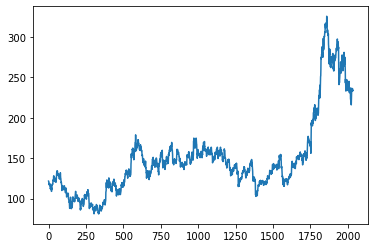

In [21]:
import matplotlib.pyplot as plt
plt.plot(close1)
plt.show()


In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close1=scaler.fit_transform(np.array(close1).reshape(-1,1))

In [24]:
print(close1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


In [29]:
trainset_size=int(len(close1)*0.70)
testset_size=len(close1)-trainset_size
print("trainsetsize:" , trainset_size,"testsetsize:",testset_size)
train_data,test_data=close1[0:trainset_size,:],close1[trainset_size:len(close1):1]

trainsetsize: 1424 testsetsize: 611


In [34]:
def datasetcreation(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)



In [35]:
time_step=100
X_train,y_train=datasetcreation(train_data,time_step)
X_test,ytest=datasetcreation(test_data,time_step) 
print(X_train.shape , y_train.shape)


(1323, 100) (1323,)


In [38]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1) 

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM



In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 21s 510ms/step - loss: 0.0082 - val_loss: 0.0153
Epoch 2/100
21/21 [==============================] - 8s 382ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 3/100
21/21 [==============================] - 8s 381ms/step - loss: 8.9632e-04 - val_loss: 0.0033
Epoch 4/100
21/21 [==============================] - 8s 375ms/step - loss: 8.1270e-04 - val_loss: 0.0035
Epoch 5/100
21/21 [==============================] - 7s 349ms/step - loss: 7.9846e-04 - val_loss: 0.0038
Epoch 6/100
21/21 [==============================] - 7s 343ms/step - loss: 7.6434e-04 - val_loss: 0.0038
Epoch 7/100
21/21 [==============================] - 7s 339ms/step - loss: 7.3421e-04 - val_loss: 0.0026
Epoch 8/100
21/21 [==============================] - 7s 327ms/step - loss: 7.4740e-04 - val_loss: 0.0031
Epoch 9/100
21/21 [==============================] - 7s 327ms/step - loss: 6.9830e-04 - val_loss: 0.0035
Epoch 10/100
21/21 [==============================] - 7s 349ms

21/21 [==============================] - 7s 329ms/step - loss: 1.5972e-04 - val_loss: 6.6021e-04
Epoch 78/100
21/21 [==============================] - 7s 336ms/step - loss: 1.3775e-04 - val_loss: 7.0948e-04
Epoch 79/100
21/21 [==============================] - 7s 333ms/step - loss: 1.5563e-04 - val_loss: 9.1544e-04
Epoch 80/100
21/21 [==============================] - 7s 331ms/step - loss: 1.3532e-04 - val_loss: 0.0010
Epoch 81/100
21/21 [==============================] - 7s 332ms/step - loss: 1.2850e-04 - val_loss: 8.3741e-04
Epoch 82/100
21/21 [==============================] - 7s 346ms/step - loss: 1.3111e-04 - val_loss: 6.8547e-04
Epoch 83/100
21/21 [==============================] - 7s 344ms/step - loss: 1.5064e-04 - val_loss: 8.0506e-04
Epoch 84/100
21/21 [==============================] - 7s 343ms/step - loss: 1.3534e-04 - val_loss: 7.4709e-04
Epoch 85/100
21/21 [==============================] - 7s 334ms/step - loss: 1.2786e-04 - val_loss: 7.0278e-04
Epoch 86/100
21/21 [=======

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 74ms/step


In [54]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



In [56]:
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))


132.8691575736722
210.06604739635034


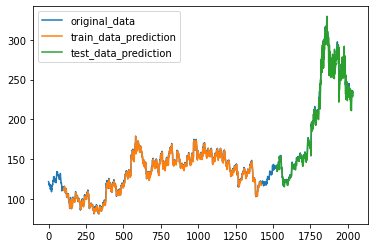

In [58]:
look_back=100
trainPredictPlot=np.empty_like(close1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(close1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(close1),label="original_data")
plt.plot(trainPredictPlot,label='train_data_prediction')
plt.plot(testPredictPlot,label='test_data_prediction')
plt.legend()
plt.show()


In [59]:
len(test_data)

611

In [61]:
x_input=test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.8527369281045751, 0.8621323529411764, 0.8345588235294117, 0.84375, 0.7146650326797386, 0.6605392156862745, 0.6542075163398693, 0.6803513071895424, 0.6689133986928104, 0.6642156862745099, 0.678921568627451, 0.6913807189542482, 0.7089460784313726, 0.7226307189542485, 0.7340686274509802, 0.7212009803921569, 0.749795751633987, 0.7689950980392157, 0.7446895424836601, 0.7120098039215685, 0.7467320261437909, 0.7549019607843137, 0.7604166666666667, 0.7598039215686274, 0.7465277777777777, 0.7624591503267975, 0.7706290849673203, 0.8041258169934642, 0.7810457516339868, 0.7941176470588236, 0.7602124183006536, 0.7348856209150327, 0.7240604575163399, 0.7399918300653596, 0.749795751633987, 0.7614379084967322, 0.7542892156862746, 0.7475490196078431, 0.769607843137255, 0.7495915032679739, 0.8171977124183007, 0.8020833333333335, 0.7773692810457518, 0.7571486928104576, 0.7937091503267975, 0.7916666666666667, 0.7714460784313726, 0.7526552287581698, 0.7269199346405228, 0.6629901960784313, 0.681985294117

In [65]:
lst_output=[]
n_step=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_step,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_step,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
        
        
    

[0.61216694]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

8 day output [[0.49937263]]
9 day input [0.66421569 0.67892157 0.69138072 0.70894608 0.72263072 0.73406863
 0.72120098 0.74979575 0.7689951  0.74468954 0.7120098  0.74673203
 0.75490196 0.76041667 0.75980392 0.74652778 0.76245915 0.77062908
 0.80412582 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046
 0.73999183 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784
 0.7495915  0.81719771 0.80208333 0.77736928 0.75714869 0.79370915
 0.79166667 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529
 0.64419935 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065
 0.64603758 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745
 0.62785948 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601
 0.62745098 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078
 0.63112745 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418
 0.62642974 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536
 0.57618464 0.55167484 0.57883987 0.625      0.63582516 0.62949346
 0.62888072 0.62765523

16 day output [[0.44274718]]
17 day input [0.7689951  0.74468954 0.7120098  0.74673203 0.75490196 0.76041667
 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582 0.78104575
 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183 0.74979575
 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915  0.81719771
 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667 0.77144608
 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935 0.62152778
 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758 0.65890523
 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948 0.64767157
 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098 0.63970588
 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745 0.61294935
 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974 0.63623366
 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464 0.55167484
 0.57883987 0.625      0.63582516 0.62949346 0.62888072 0.62765523
 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301 0.61216694
 0.5909006  0.570505

24 day output [[0.3983402]]
25 day input [0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.62418301 0.61216694 0.5909006  0.57050508
 0.55431736 0.54131216 0.5298211  0.51903862 0.5088554  0.49937263
 0.49063191 0.48257312 0.4

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [67]:
len(close1)

2035

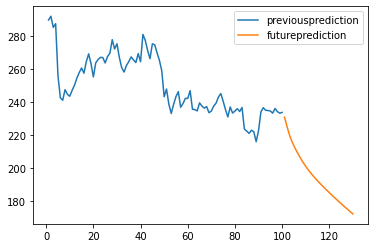

In [70]:
plt.plot(day_new,scaler.inverse_transform(close1[1935:]),label="previousprediction")
plt.plot(day_pred,scaler.inverse_transform(lst_output),label="futureprediction")
plt.legend()
plt.show() 
